In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from torchsummary import summary
import seaborn as sns
import copy

In [4]:
data = pd.read_csv("/Users/veera/Data/Repos/Udemy/.dataset/mnist_train.csv", delimiter=',', header=None)
labels = data[0]
data = data.drop(columns=[0])
data = np.array(data)
labels = np.array(labels)
# The min and max values of the data are 0 and 255
# It is normalized to 0 and 1
data_norm = data/np.max(data)
data_tensor = torch.tensor(data_norm).float()
label_tensor = torch.tensor(labels).long()

In [5]:
def model():
    class aenet(nn.Module):
        def __init__(self):
            super().__init__()
            self.input = nn.Linear(784, 250)
            self.enc = nn.Linear(250, 50)
            self.latent = nn.Linear(50, 250)
            self.dec = nn.Linear(250, 784)
        def forward(self, x):
            x = F.relu(self.input(x))
            x = F.relu(self.enc(x))
            x = F.relu(self.latent(x))
            y = torch.sigmoid(self.dec(x))
            # we want the output in the same range (normalized as 0 to 1 in the previous step) as the input numerical data
            return y
        
    net = aenet()
    loss_function = nn.MSELoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

    return net, loss_function, optimizer
    
        


In [6]:
net, loss_function, optimizer = model()

In [12]:
sample_x = data_tensor[:5]
sample_yhat = net(sample_x)

In [15]:
sample_x.shape

torch.Size([5, 784])

In [16]:
sample_yhat.shape

torch.Size([5, 784])

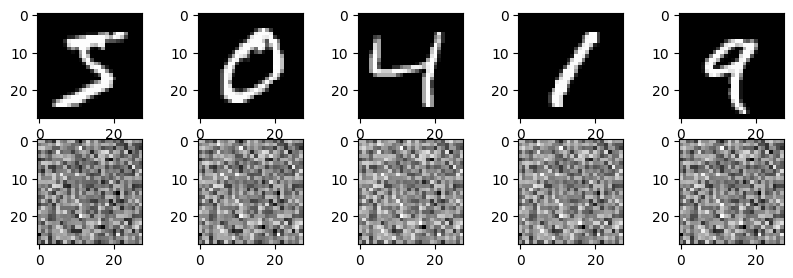

In [20]:
# checking the model
fig, axs = plt.subplots(2, 5, figsize=(10,3))
for i in range(5):
    axs[0, i].imshow(sample_x[i,:].view(28,28).detach(), cmap='gray')
    axs[1, i].imshow(sample_yhat[i,:].view(28,28).detach(), cmap='gray')


In [24]:
def train():
    epochs = 10000
    net, loss_function, optimizer = model()
    losses = torch.zeros(epochs)
    for i in range(epochs):
        # select a random set of 32 image instead of using minibatch format
        randomidx = np.random.choice(data_tensor.shape[0], size=32)
        x = data_tensor[randomidx,:]
        yhat = net(x)
        loss = loss_function(yhat, x)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses[i] = loss.item()
    return losses, net

In [25]:
loss, net = train()

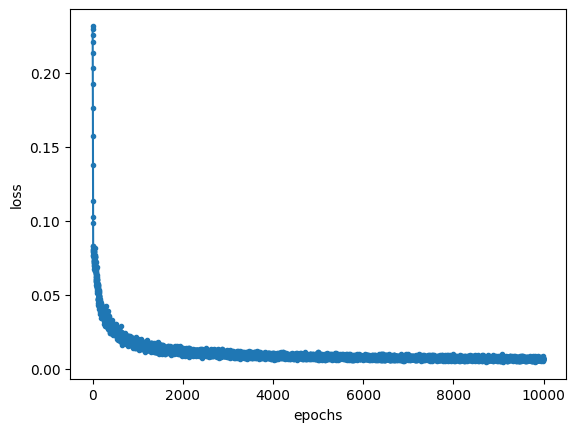

In [27]:
plt.plot(loss, '.-')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

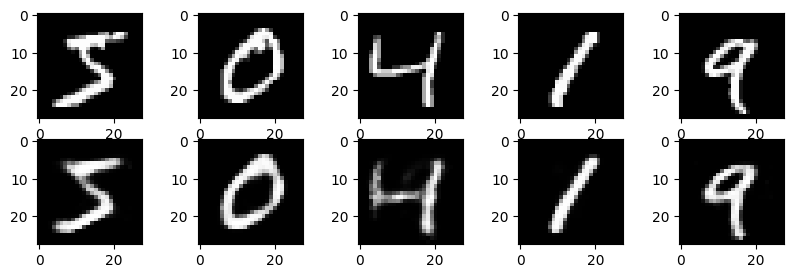

In [28]:
# checking the trained model
sample_yhat = net(sample_x)

fig, axs = plt.subplots(2, 5, figsize=(10,3))
for i in range(5):
    axs[0, i].imshow(sample_x[i,:].view(28,28).detach(), cmap='gray')
    axs[1, i].imshow(sample_yhat[i,:].view(28,28).detach(), cmap='gray')


# Add noise to some sample images

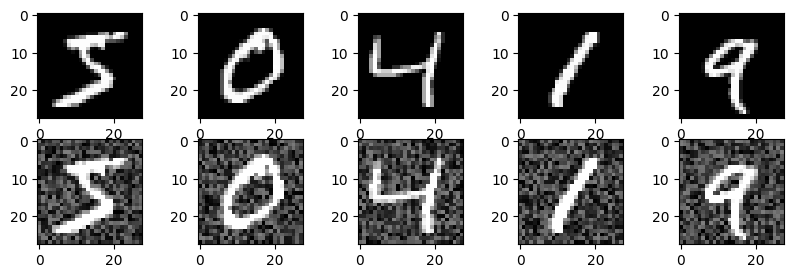

In [37]:
noisy_x = data_tensor[:10, :]
noisy_x = noisy_x + torch.rand_like(data_tensor[:10, :])/2
noisy_x[noisy_x>1]=1

fig, axs = plt.subplots(2, 5, figsize=(10,3))
for i in range(5):
    axs[0, i].imshow(data_tensor[i,:].view(28,28).detach(), cmap='gray')
    axs[1, i].imshow(noisy_x[i,:].view(28,28).detach(), cmap='gray')


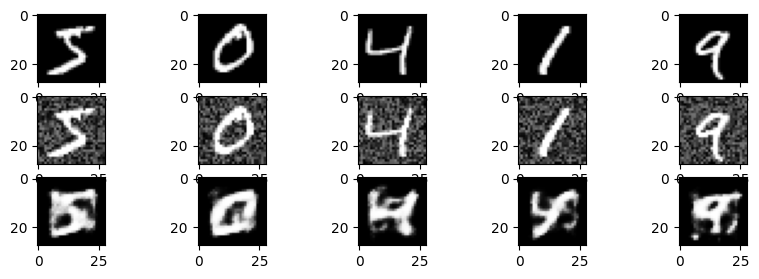

In [39]:
# checking the trained model
noisy_yhat = net(noisy_x)

fig, axs = plt.subplots(3, 5, figsize=(10,3))
for i in range(5):
    axs[0, i].imshow(data_tensor[i,:].view(28,28).detach(), cmap='gray')
    axs[1, i].imshow(noisy_x[i,:].view(28,28).detach(), cmap='gray')
    axs[2, i].imshow(noisy_yhat[i,:].view(28,28).detach(), cmap='gray')


# Decent job of cleaning up the noise